In [73]:
import tensorflow as tf
import os

In [74]:
tf.__version__

'2.15.0'

In [75]:
# using GPU
print(tf.test.is_gpu_available())
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

False


In [76]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [77]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [79]:
all_animals = ['Fish','Goldfish','Harbor seal','Jellyfish',
              'Lobster','Oyster','Sea turtle','Squid','Starfish']
training_dir = r'animal_images/train'
testing_dir = r'animal_images/test'

In [80]:
for animal in all_animals:
    num = len(os.listdir(os.path.join(training_dir, animal)))
    print(animal,num)

Fish 89
Goldfish 65
Harbor seal 46
Jellyfish 85
Lobster 39
Oyster 62
Sea turtle 82
Squid 49
Starfish 104


In [81]:
for animal in all_animals:
    num = len(os.listdir(os.path.join(testing_dir, animal)))
    print(animal,num)

Fish 18
Goldfish 13
Harbor seal 15
Jellyfish 31
Lobster 14
Oyster 23
Sea turtle 23
Squid 25
Starfish 23


In [82]:
tf.keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [83]:
data_train = tf.keras.utils.image_dataset_from_directory(training_dir)
data_test = tf.keras.utils.image_dataset_from_directory(testing_dir)

Found 621 files belonging to 9 classes.
Found 185 files belonging to 9 classes.


In [84]:
data_iterator = data_train.as_numpy_iterator()

In [85]:
batch = data_iterator.next()

In [86]:
#image representation
print(batch[0].shape)
# lable
print(batch[1])

(32, 256, 256, 3)
[7 0 5 4 6 0 0 0 2 0 6 3 8 5 2 8 8 7 3 3 0 5 4 0 7 7 3 5 3 2 7 3]


In [87]:
'''
fig, ax = plt.subplot(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
'''

'\nfig, ax = plt.subplot(ncols=4, figsize=(20,20))\nfor idx, img in enumerate(batch[0][:4]):\n    ax[idx].imshow(img.astype(int))\n    ax[idx].title.set_text(batch[1][idx])\n'

# Preprocessing

In [88]:
data_train = data_train.map(lambda x,y: (x/255,y))
data_test = data_test.map(lambda x,y: (x/255,y))

In [89]:
data_train.as_numpy_iterator()
data_test.as_numpy_iterator()

In [90]:
for images, text in data_train:
  print(text)

tf.Tensor([3 1 3 7 4 7 5 8 5 0 0 0 4 7 6 0 3 6 7 6 6 8 8 5 6 2 6 0 2 2 6 4], shape=(32,), dtype=int32)
tf.Tensor([3 6 6 3 6 5 7 2 6 8 6 0 3 8 8 0 8 7 3 6 1 8 2 7 6 0 3 8 2 5 6 8], shape=(32,), dtype=int32)
tf.Tensor([0 7 8 4 1 0 6 1 1 0 2 7 5 1 1 1 0 3 1 7 8 8 3 3 7 7 6 3 7 6 0 3], shape=(32,), dtype=int32)
tf.Tensor([6 2 4 0 7 5 2 0 3 5 6 6 1 3 8 8 2 0 3 0 0 7 2 3 0 1 8 6 5 3 3 3], shape=(32,), dtype=int32)
tf.Tensor([3 5 5 0 3 6 8 5 6 5 2 4 5 4 8 7 3 8 1 5 4 8 8 7 0 6 8 1 7 0 3 3], shape=(32,), dtype=int32)
tf.Tensor([6 3 1 2 6 8 7 4 8 5 8 1 3 0 0 0 5 6 4 8 1 5 1 0 3 3 6 0 2 0 3 5], shape=(32,), dtype=int32)
tf.Tensor([8 5 1 5 0 3 6 8 6 2 4 2 8 0 6 2 3 2 8 1 5 3 3 2 6 3 6 7 0 6 1 0], shape=(32,), dtype=int32)
tf.Tensor([5 8 5 3 7 3 7 1 1 8 8 4 8 2 8 1 7 0 1 3 5 2 2 6 3 8 0 3 1 5 0 8], shape=(32,), dtype=int32)
tf.Tensor([3 1 6 1 1 8 0 8 8 5 8 0 6 7 5 4 0 0 6 3 0 1 5 5 6 7 5 3 8 8 3 7], shape=(32,), dtype=int32)
tf.Tensor([5 4 8 8 2 1 3 6 6 8 6 3 3 0 4 4 2 1 0 5 0 5 8 6 2 0 6 4 3 5 1 

In [91]:
for images, text in data_test:
  print(text)

tf.Tensor([4 3 4 2 1 8 7 5 5 3 3 4 5 5 6 8 1 2 2 3 5 3 1 6 8 5 5 3 6 7 3 0], shape=(32,), dtype=int32)
tf.Tensor([6 3 7 6 0 6 3 5 1 8 3 0 6 3 4 6 3 3 3 5 2 0 4 1 6 5 0 0 3 7 4 0], shape=(32,), dtype=int32)
tf.Tensor([3 5 6 0 5 4 6 2 7 8 6 7 7 8 2 0 7 0 3 3 3 2 4 6 2 4 8 3 6 8 2 7], shape=(32,), dtype=int32)
tf.Tensor([6 6 5 7 7 2 0 1 7 0 8 0 3 7 5 7 6 0 8 1 7 6 3 1 5 8 0 1 6 6 8 8], shape=(32,), dtype=int32)
tf.Tensor([2 8 8 3 8 3 4 7 2 3 7 1 2 3 3 2 5 6 3 4 7 8 7 8 2 6 8 3 5 7 8 6], shape=(32,), dtype=int32)
tf.Tensor([0 5 4 5 0 8 1 0 3 3 1 5 7 5 7 7 8 8 5 7 7 4 4 1 5], shape=(25,), dtype=int32)


### Split

In [92]:
len(data_train)

20

In [93]:
train_size = int(len(data_train)*0.7)
val_size = int(len(data_train)*0.3)

print(train_size)
print(val_size)

14
6


In [94]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)

# Build Model

In [95]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [96]:
model = Sequential()

model.add(Conv2D(16,(3,3),1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))


In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

# Train

In [99]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [100]:
hist = model.fit(train,epochs=19,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/19


/Users/thiraputkongnok/anaconda3/envs/env_imageProcessing/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 5s 327ms/step - loss: 2.1444 - accuracy: 0.2321 - val_loss: 2.0039 - val_accuracy: 0.2254
Epoch 2/19
14/14 [==============================] - 5s 335ms/step - loss: 2.0164 - accuracy: 0.2589 - val_loss: 1.9616 - val_accuracy: 0.3295
Epoch 3/19
14/14 [==============================] - 5s 300ms/step - loss: 1.8714 - accuracy: 0.3013 - val_loss: 1.7186 - val_accuracy: 0.3295
Epoch 4/19
14/14 [==============================] - 5s 297ms/step - loss: 1.6844 - accuracy: 0.3862 - val_loss: 1.6115 - val_accuracy: 0.3931
Epoch 5/19
14/14 [==============================] - 5s 299ms/step - loss: 1.5376 - accuracy: 0.4598 - val_loss: 1.4630 - val_accuracy: 0.4740
Epoch 6/19
14/14 [==============================] - 5s 304ms/step - loss: 1.3105 - accuracy: 0.5223 - val_loss: 1.1571 - val_accuracy: 0.6301
Epoch 7/19
14/14 [==============================] - 5s 305ms/step - loss: 1.1203 - accuracy: 0.6228 - val_loss: 1.0794 - val_accuracy: 0.6532
Epoch 8/19
14/14 

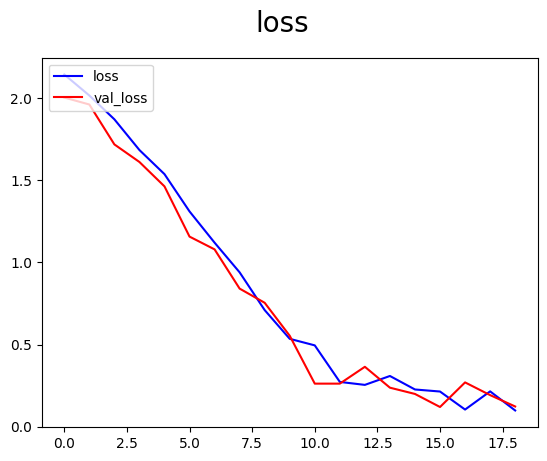

In [101]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

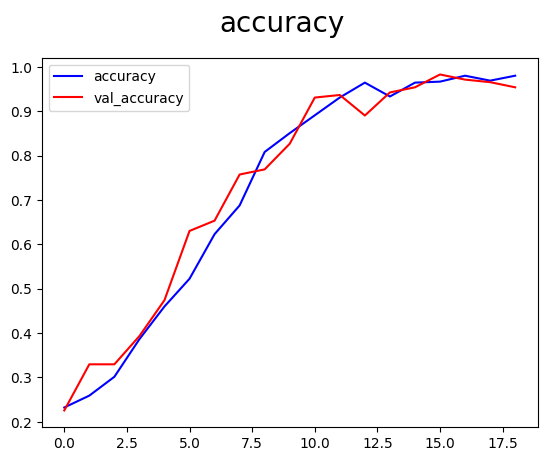

In [102]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evauation

In [103]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [104]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [106]:
len(data_test)

6

In [113]:
for batch in data_test:
    X,y = batch
    yhat = model.predict(X)
    yhat_array = []

    for yhat_i in yhat:
        yhat_array.append(yhat_i.argmax())
    
    yhat_array = np.array(yhat_array)
    
    print("test_set  :",y.numpy())
    print("prediction:",yhat_array)
    
    pre.update_state(y, yhat_array)
    re.update_state(y, yhat_array)
    acc.update_state(y, yhat_array)

1/1 [==============================] - 0s 64ms/step
test_set  : [4 3 3 4 3 7 2 6 4 8 2 5 4 7 5 6 1 1 6 8 0 1 5 4 6 6 7 3 6 5 0 2]
prediction: [4 3 3 4 7 8 8 8 4 8 7 8 1 0 8 8 4 0 6 8 2 0 8 1 8 8 5 7 8 5 2 0]
1/1 [==============================] - 0s 62ms/step
test_set  : [7 3 5 6 8 3 0 0 4 1 7 1 1 7 6 7 5 5 8 3 8 3 3 7 8 2 2 3 7 7 3 1]
prediction: [8 6 1 6 0 3 0 8 8 4 0 5 8 0 8 3 0 1 6 3 1 0 0 7 0 7 2 0 0 1 3 1]
1/1 [==============================] - 0s 62ms/step
test_set  : [7 3 2 3 6 6 3 5 0 8 7 7 5 8 6 2 5 3 1 0 6 2 6 3 5 4 0 0 6 8 3 8]
prediction: [6 3 7 3 8 2 0 7 0 8 8 4 8 1 8 0 4 4 8 4 8 6 8 0 8 8 0 0 8 8 6 7]
1/1 [==============================] - 0s 64ms/step
test_set  : [3 5 7 5 7 0 5 4 3 8 5 4 0 4 6 8 0 3 1 1 6 4 5 4 0 8 6 8 5 3 7 3]
prediction: [2 7 4 0 8 6 5 4 1 8 7 8 0 1 6 7 0 0 5 8 6 4 7 8 0 8 8 8 6 3 6 3]
1/1 [==============================] - 0s 65ms/step
test_set  : [8 6 7 3 3 2 5 6 3 5 2 7 6 8 5 7 0 8 7 8 5 5 2 2 6 7 3 7 8 0 3 8]
prediction: [8 6 6 3 5 2 7 2 0 4 6 1 6

In [114]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9271523356437683, Recall:0.8383233547210693, Accuracy:0.0972972959280014
